##Install and load packages

In [ ]:
#use this command to check current work directory and upload required files here
# the .csv data file and .otf font file should be uploaded to current work directory
getwd()

[1] "/content"

In [1]:

install.packages('dplyr')
install.packages('png')
install.packages('showtext') #directly works on .OTF fonts


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [57]:
library(ggplot2)
library(dplyr)
library(showtext)
library(png)
library(grid)



### custome font

In [7]:
font_add("avenir_lt_pro","a-avenir-next-lt-pro.otf")
showtext_auto()

## Plot


In [44]:
#read logo
get_png <- function(filename) {
  grid::rasterGrob(png::readPNG(filename),interpolate = TRUE)
}

l <- get_png("gw_ci_rsc_2cs_pos.png")

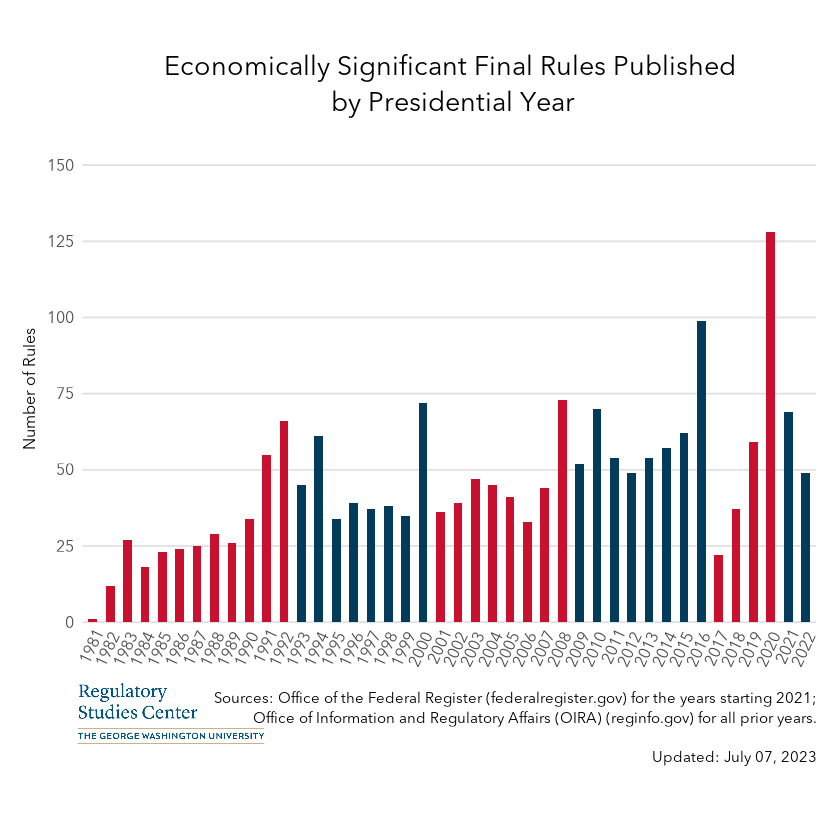

In [65]:
# Economically Significant Final Rules Published by Presidential Year

#load data
sig <- read.csv("/content/ES_rules_published_presidential_year_2023-03-28.csv")
# modify column names
colnames(sig) <- c("year", "econ", "excluding.withdrawn")

# delete excluding.withdrawn column
sig$excluding.withdrawn <- NULL

# remove rows with NA values
sig <- sig[complete.cases(sig), ]

# create party column (this must be manually updated with years of Democrat Presidents)
sig$party <- ifelse(sig$year %in% c(1993:2000, 2009:2016, 2021:2024), "dem", "rep")

# make party factor variable
sig$party <- as.factor(sig$party)

current_date <- format(Sys.Date(), "%B %d, %Y")



caption <- paste("Sources: Office of the Federal Register (federalregister.gov) for the years starting 2021;
                  Office of Information and Regulatory Affairs (OIRA) (reginfo.gov) for all prior years.

                  Updated:", current_date)


bar1 <- ggplot(sig, aes(x = year, y = econ, fill = party)) +
  geom_bar(stat = "identity", width = 0.5,) +
  scale_fill_manual(values = c("#033C5A", "#C9102F")) +
  theme_minimal() +
  ggtitle("Economically Significant Final Rules Published \n by Presidential Year") +
  ylab("Number of Rules") +
  xlab("") +
  scale_y_continuous(breaks = seq(0, max(sig$econ) + 25, by = 25), expand = c(0, 0),limits = c(0, max(sig$econ) + 25))+ #add 150 line
  labs(caption = caption) +
  annotation_custom(l, xmin = -9, xmax = 20, ymin = -20, ymax = -40) + # for logo
  coord_cartesian(clip = "off") + # for logo
  theme(
    plot.title = element_text(hjust = 0.5, vjust=-2, margin = margin(b = 40, unit = "pt"), size=20), #size
    axis.text.x = element_text(angle =65, hjust = 1, vjust = 1, size=12),
    axis.text.y = element_text(size=12),
    axis.title.y = element_text(size = 12, angle = 90, vjust = 1),
    legend.position = "none",
    text =element_text(family = "avenir_lt_pro"),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "#E0E0E0", linetype = "solid"),
    panel.grid.minor = element_blank(),
    plot.caption = element_text(hjust = 1, margin = margin(t = 0, unit = "pt"), size=11),
    plot.margin = unit(c(1, 1, 3, 1), "lines"),
  )

bar1
#ggsave("plot1.pdf", width = 12.5, height = 9, dpi = 300)


- *save plot as pdf ( hyperlink) fixed*
- *size and position of title fixed*
- *size of x&y label, annotation fixed*
- *scale of y. fixed *
- patent of blue bar
- hyperlink of logo
- *adjust logo fixed *
- box shared link of dataset to import data

### Brief of style guide

**Please refer to the style guide(in the repo) for more details and correction**



1.   Color Scheme for Charts and Graph


*   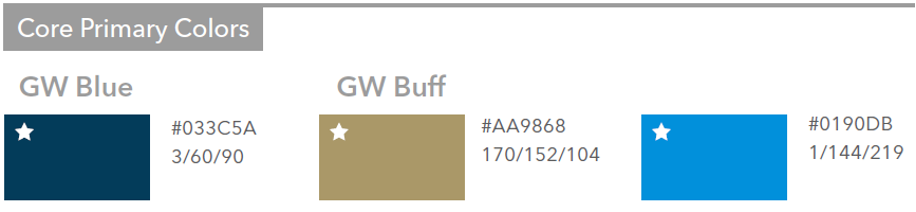
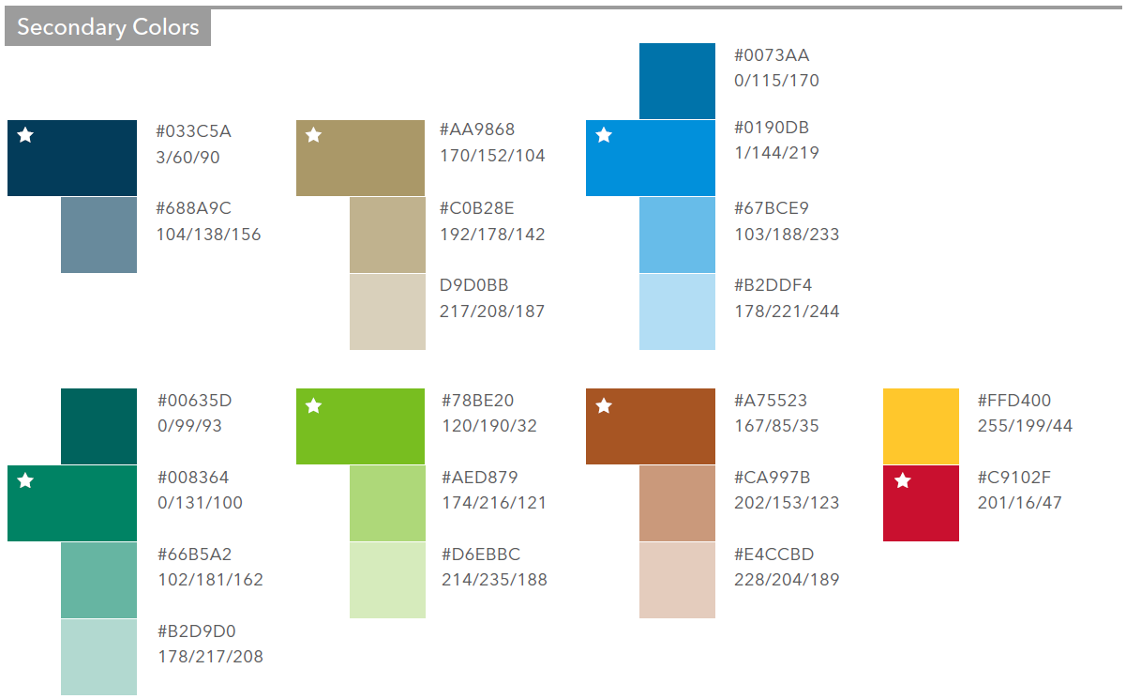

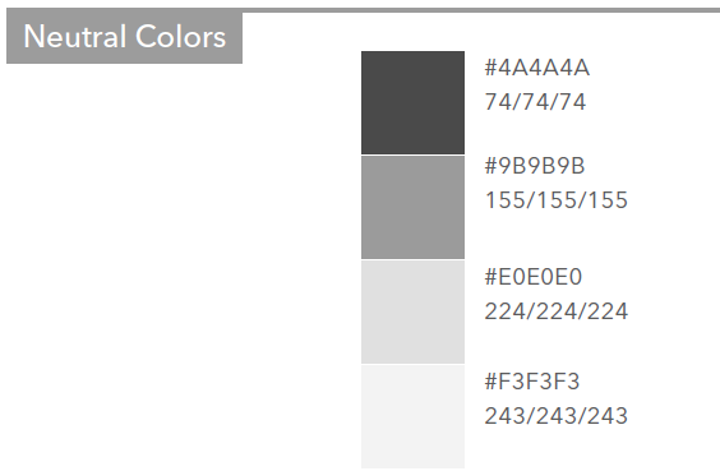






*   **Use a white background for all charts and graphs**
*   **Use a standard black for all axis labels**







2.  Formatting


*   Fonts:For all Reg Stats charts, the primary font is AvenirNext LT Pro Regular *(cleared)*
        - If the font is too wide for axis labels, use Avenir Next LT Pro Condensed
        - All other fonts should only be used if necessary

        
*   Formatting

        - Size of title:20, X&Y axis labels: 12, data source&dateuploaded: 11
        - X-axis label rotation degree: 65 *(cleared)*
        - tick mark lines : 0.1 pt width, black, 60% transparency
        - The gap width between line is 100%
        - Bars format
              - for Democratic administration data:
                    - patent fill(dotted:75%)
                    - GW blue*(cleared)*
                    - no border line(cleared)
              - for Republican
                    - solid fill*(cleared)*
                    - secondary red *(cleared)*
                    - no border line*(cleared)*
        - Logo has H:0.81, W:2.49, scale height&width:30%, hyperlink
        - The source should be hyperlinked with the source of data






*****In this graph I applied #033C5A for blue and #C9102F for red and #E0E0E0 for grey, removed border line.**

## Example
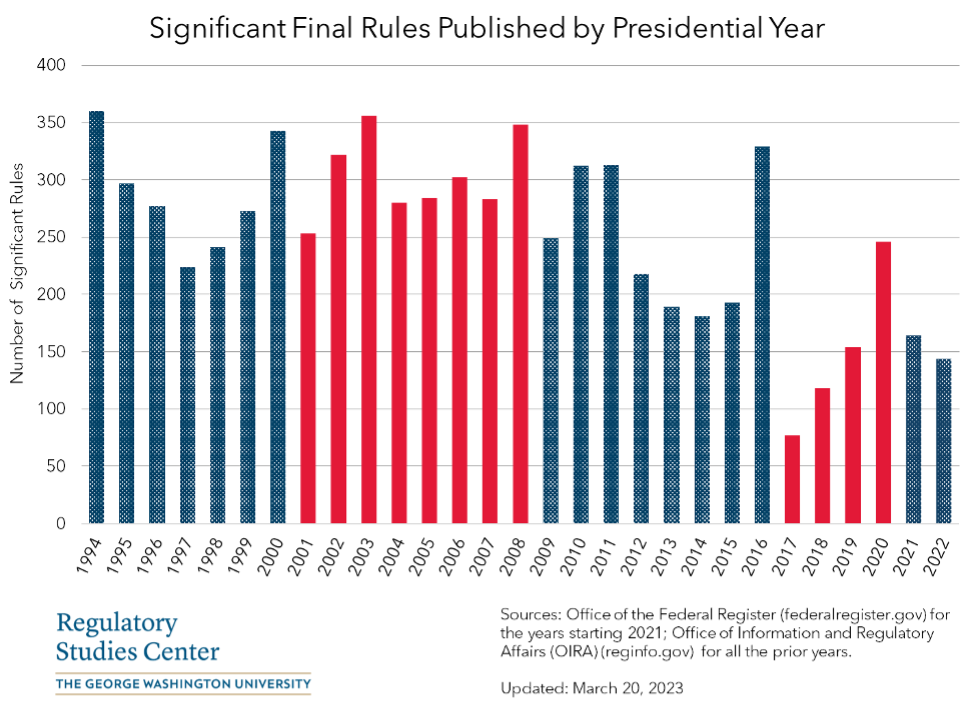